<a href="https://colab.research.google.com/github/Gulzar-khan/ML-PRACTICE/blob/main/correction_of_smruti_for_Assignment_Solution_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>MEDV is the dependent variable.

## In the linear regression assignment, you were not able to take care of the multicollinearity. Use principal component analysis to come up with linearly uncorrelated variables and run linear regression with regularization with these new features. You can experiment around with different degrees of variance you want to retain in the data.</b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_df=pd.read_csv('/content/drive/MyDrive/Housing.csv', sep='\s+', header=None, names=['CRIM',  'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

In [ ]:
dataset_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
for column in dataset_df:
  dataset_df[column]=pd.to_numeric(dataset_df[column],errors='coerce')

In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


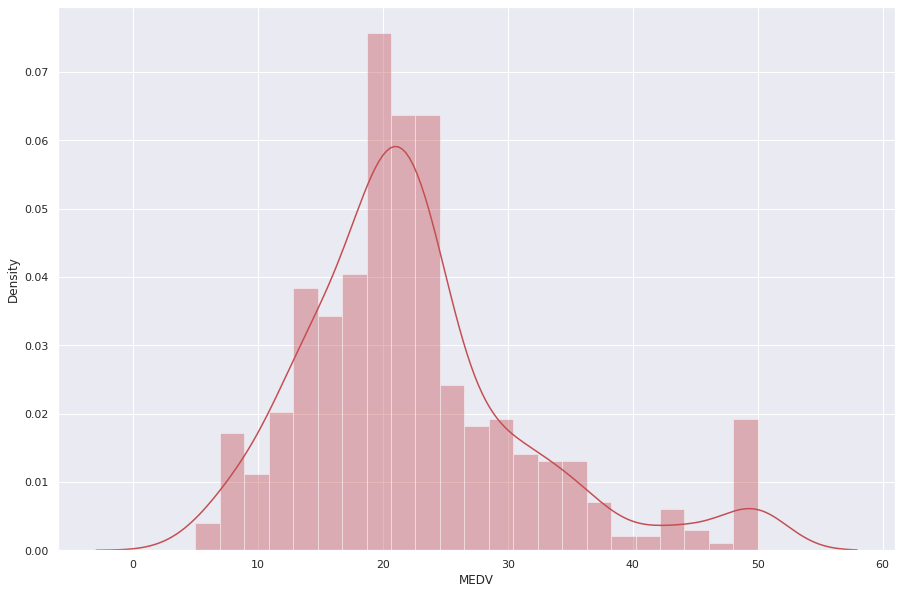

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(dataset_df['MEDV'],color='r')

In [ ]:
lst=[]
X=dataset_df.iloc[:,:-1]
Y=dataset_df.iloc[:,-1]
linearReg=LinearRegression()
lasso=Lasso(alpha=0.1 , max_iter= 3000)
ridge=Ridge(alpha=0.1, fit_intercept=True)


for model in [linearReg,lasso,ridge]:
  df_simple_lin_reg=pd.DataFrame(columns=['MSE','RMSE','r2_score','MAE'])
  for elem in range(1,14):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=42)

    # scaling
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)

    # applying PCA
    pca = PCA(n_components=elem)
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)

    # Fitting Multiple Linear Regression to the Training set
    regressor = model
    regressor.fit((X_train_pca),(y_train))

    y_pred = regressor.predict(X_test_pca)

    MSE  = mean_squared_error((y_test),(y_pred))
    # print("MSE :" , MSE)

    RMSE = np.sqrt(MSE)
    # print("RMSE :" ,RMSE)

    r2 = r2_score((y_test),(y_pred))
    # print("R2 :" ,r2)

    Adjusted_R2 = (1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
    # print("Adjusted r2 :" , Adjusted_R2)

    MAE=mean_absolute_error(y_test, y_pred)
    variance=pca.explained_variance_
    df_simple_lin_reg= pd.DataFrame(df_simple_lin_reg.append({'MSE':MSE,'RMSE':RMSE,'r2_score':r2,'Adjusted_R2':Adjusted_R2,'MAE':MAE},ignore_index=True))
    df_simple_lin_reg.index = range(1,len(df_simple_lin_reg)+1)
  lst.append(df_simple_lin_reg)
  print(f'This is the table for {model} for different value of principal component')
  print(df_simple_lin_reg)

This is the table for LinearRegression() for different value of principal component
          MSE      RMSE  r2_score       MAE  Adjusted_R2
1   42.416510  6.512796  0.421597  4.565360     0.336151
2   44.739173  6.688735  0.389924  4.709716     0.299799
3   29.206732  5.404325  0.601729  3.410381     0.542893
4   29.631667  5.443498  0.595934  3.428009     0.536243
5   30.109736  5.487234  0.589415  3.385363     0.528761
6   29.639091  5.444180  0.595833  3.308242     0.536127
7   29.680046  5.447940  0.595275  3.315401     0.535486
8   29.539706  5.435044  0.597188  3.336398     0.537682
9   29.554018  5.436361  0.596993  3.346350     0.537458
10  28.692251  5.356515  0.608744  3.308451     0.550945
11  27.782425  5.270904  0.621151  3.247439     0.565185
12  26.096055  5.108430  0.644147  3.323766     0.591578
13  24.291119  4.928602  0.668759  3.189092     0.619826
This is the table for Lasso(alpha=0.1, max_iter=3000) for different value of principal component
          MSE      RM

# For simple regression

In [ ]:
lst[0]

,MSE,RMSE,r2_score,MAE,Adjusted_R2
1,42.416510,6.512796,0.421597,4.565360,0.336151
2,44.739173,6.688735,0.389924,4.709716,0.299799
3,29.206732,5.404325,0.601729,3.410381,0.542893
4,29.631667,5.443498,0.595934,3.428009,0.536243
5,30.109736,5.487234,0.589415,3.385363,0.528761
6,29.639091,5.444180,0.595833,3.308242,0.536127
7,29.680046,5.447940,0.595275,3.315401,0.535486
8,29.539706,5.435044,0.597188,3.336398,0.537682
9,29.554018,5.436361,0.596993,3.346350,0.537458
10,28.692251,5.356515,0.608744,3.308451,0.550945


# For lasso regression

In [ ]:
lst[1]

,MSE,RMSE,r2_score,MAE,Adjusted_R2
1,42.417424,6.512866,0.421584,4.566767,0.336136
2,44.456192,6.667548,0.393783,4.692944,0.304228
3,29.071019,5.391755,0.603579,3.404672,0.545017
4,29.331563,5.415862,0.600027,3.416398,0.540940
5,29.625512,5.442932,0.596018,3.353134,0.536339
6,29.098565,5.394309,0.603204,3.267897,0.544586
7,29.021762,5.387185,0.604251,3.266982,0.545788
8,28.796504,5.366237,0.607323,3.277757,0.549314
9,28.796504,5.366237,0.607323,3.277757,0.549314
10,28.493880,5.337966,0.611449,3.262886,0.554050


# For ridge regression

In [ ]:
lst[2]

,MSE,RMSE,r2_score,MAE,Adjusted_R2
1,42.416505,6.512796,0.421597,4.565368,0.336151
2,44.737237,6.688590,0.389951,4.709606,0.299830
3,29.205908,5.404249,0.601740,3.410346,0.542906
4,29.630729,5.443412,0.595947,3.427980,0.536257
5,30.107446,5.487025,0.589446,3.385295,0.528796
6,29.636448,5.443937,0.595869,3.308135,0.536168
7,29.676909,5.447652,0.595317,3.315277,0.535535
8,29.536221,5.434724,0.597236,3.336208,0.537737
9,29.550468,5.436034,0.597042,3.346151,0.537514
10,28.689580,5.356265,0.608781,3.308272,0.550987


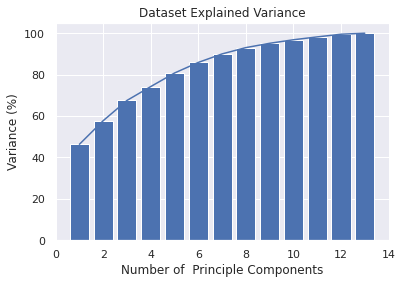

In [ ]:
plt.figure()
plt.plot(range(1,14), np.cumsum(pca.explained_variance_ratio_)*100)
plt.bar(range(1,14), np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of  Principle Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.ylim(0,105)
plt.show()

In [ ]:
pca.explained_variance_ratio_*100

array([46.36588614, 11.40187666,  9.77548441,  6.70241576,  6.5389617 ,
        5.1158332 ,  4.10826903,  3.04299753,  2.08460299,  1.70239292,
        1.37915579,  1.29327592,  0.48884796])